# Country status prediction model
## A simple machine learning model to predict the development status of a country when some key values are provided

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

## World Bank's Life Expectancy dataset is used for creating the model

In [2]:
df = pd.read_csv('original_Life_Expectancy_Data.csv')

In [3]:
print(df.head(5))

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [6]:
df.columns = [c.replace(' ', '_') for c in df.columns]#replacing spaces in column names with '_'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life_expectancy_                   2928 non-null float64
Adult_Mortality                    2928 non-null float64
infant_deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage_expenditure             2938 non-null float64
Hepatitis_B                        2385 non-null float64
Measles_                           2938 non-null int64
_BMI_                              2904 non-null float64
under-five_deaths_                 2938 non-null int64
Polio                              2919 non-null float64
Total_expenditure                  2712 non-null float64
Diphtheria_                        2919 non-null float64
_HIV/AIDS                          2938 non-null

In [8]:
Y= df[['Status']]#to predict

### We use the filters of :-
#### ->Body mass index, 
#### ->Schooling
#### ->Gross Domestic Product value
#### ->Alcohol COnsumption
#### ->Total Expenditure
#### ->Population
#### ->Deaths before the age of five
#### ->Life Expectancies

In [9]:
X= df[['_BMI_','Schooling','GDP','Alcohol','Total_expenditure','Population','under-five_deaths_','Life_expectancy_']]#columns being used to train
#x_encoded = pd.get_dummies(y_attributes) #one hot encoding for conversion of categorical data to numeric

### We plot a correlation heatmap inorder to find out the relations among the different attributes of the given dataset

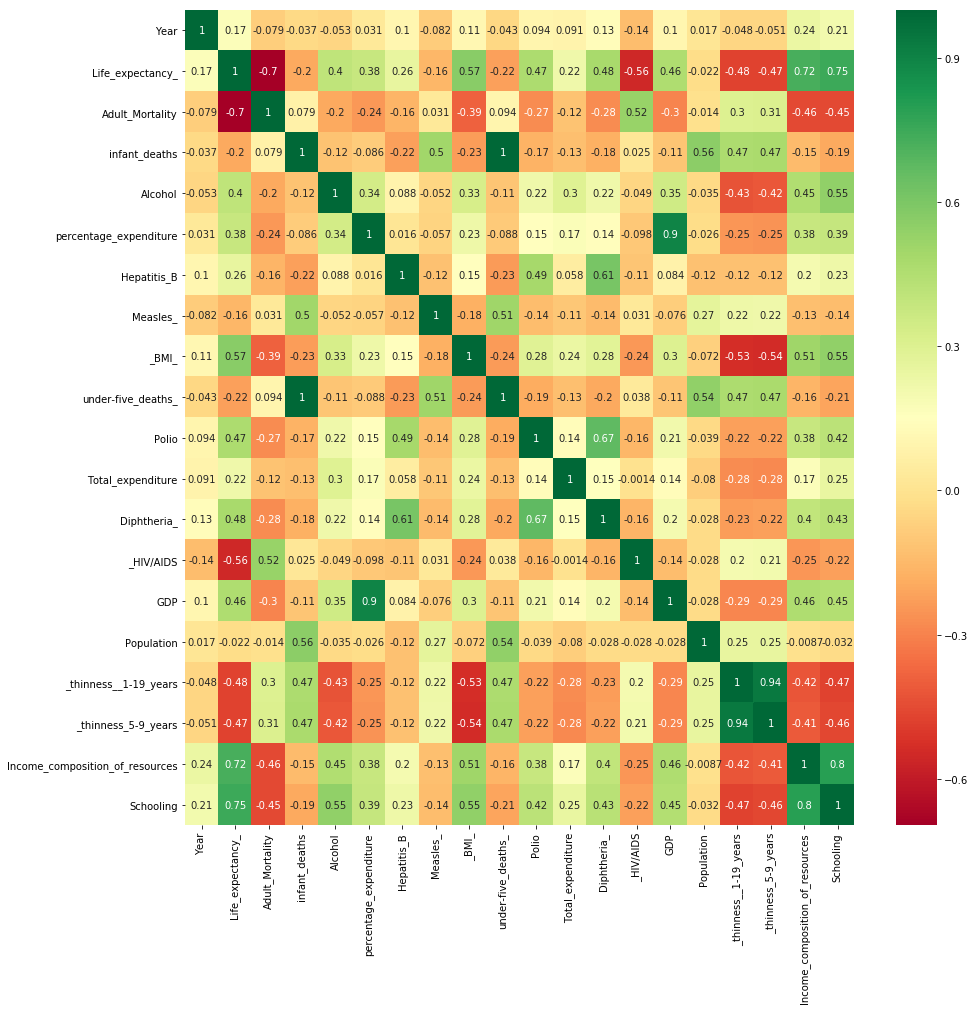

In [11]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
#training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 40)

## We use the XGBoost machine learning algorithm to train our model and predict the values

In [19]:
from xgboost import XGBClassifier as xgbc
clf = xgbc()
clf.fit(train_X, train_y)
print(100 * accuracy_score(clf.predict(test_X), test_y))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


95.0


### The prediction was succesful and the resultant model wasproved to be 95% accurate.....